# 0. 데이콘 Basic 전화 해지 여부 분류 AI 경진대회
- [데이콘 Basic 전화 해지 여부 분류 AI 경진대회](https://dacon.io/competitions/official/236075/overview/description)

<br>

* ID : 샘플 별 고유 ID
* 가입일 : 서비스에 가입한 일수
*  음성사서함이용 : 음성사서함 이용 건수
* 주간통화시간 : 8시 ~ 16시까지의 통화 시간
* 주간통화횟수 : 8시 ~ 16시까지의 통화 횟수
* 주간통화요금 : 8시 ~ 16시까지의 통화 요금
* 저녁통화시간 : 16시 ~ 0시까지의 통화 시간
* 저녁통화횟수 : 16시 ~ 0시까지의 통화 횟수
* 저녁통화요금 : 16시 ~ 0시까지의 통화 요금
* 밤통화시간 : 0시 ~ 8시까지의 통화 시간
* 밤통화횟수 : 0시 ~ 8시까지의 통화 횟수
* 밤통화요금 : 0시 ~ 8시까지의 통화 요금
* 상담전화건수 : 고객센터에 전화를 건 횟수
* 전화해지여부 : 0(서비스 유지)/ 1(서비스 해지)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 56.5 MB/s eta 0:00:00


In [3]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
train = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/cancel_call/train.csv", index_col="ID")
train

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0


In [6]:
test = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/cancel_call/test.csv", index_col="ID")
test

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
ID,,,,,,,,,,,,
TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0
TEST_00002,34,1,243.3,205,21.3,225.7,205,29.00,92.6,29,2.44,2
TEST_00003,209,86,83.0,93,24.1,270.6,220,22.89,266.9,81,2.80,6
TEST_00004,202,0,293.2,23,31.0,294.0,24,26.39,223.8,33,6.66,2
...,...,...,...,...,...,...,...,...,...,...,...,...
TEST_12938,322,1,282.4,202,89.9,270.2,321,32.80,293.6,321,8.88,2
TEST_12939,222,0,233.5,209,34.6,234.0,92,23.22,224.4,202,9.63,2
TEST_12940,98,29,223.4,209,29.3,223.9,203,28.82,230.0,208,22.26,2


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30200 entries, TRAIN_00000 to TRAIN_30199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      30200 non-null  int64  
 1   음성사서함이용  30200 non-null  int64  
 2   주간통화시간   30200 non-null  float64
 3   주간통화횟수   30200 non-null  int64  
 4   주간통화요금   30200 non-null  float64
 5   저녁통화시간   30200 non-null  float64
 6   저녁통화횟수   30200 non-null  int64  
 7   저녁통화요금   30200 non-null  float64
 8   밤통화시간    30200 non-null  float64
 9   밤통화횟수    30200 non-null  int64  
 10  밤통화요금    30200 non-null  float64
 11  상담전화건수   30200 non-null  int64  
 12  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 3.2+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12943 entries, TEST_00000 to TEST_12942
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      12943 non-null  int64  
 1   음성사서함이용  12943 non-null  int64  
 2   주간통화시간   12943 non-null  float64
 3   주간통화횟수   12943 non-null  int64  
 4   주간통화요금   12943 non-null  float64
 5   저녁통화시간   12943 non-null  float64
 6   저녁통화횟수   12943 non-null  int64  
 7   저녁통화요금   12943 non-null  float64
 8   밤통화시간    12943 non-null  float64
 9   밤통화횟수    12943 non-null  int64  
 10  밤통화요금    12943 non-null  float64
 11  상담전화건수   12943 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 1.3+ MB


# 1. EDA

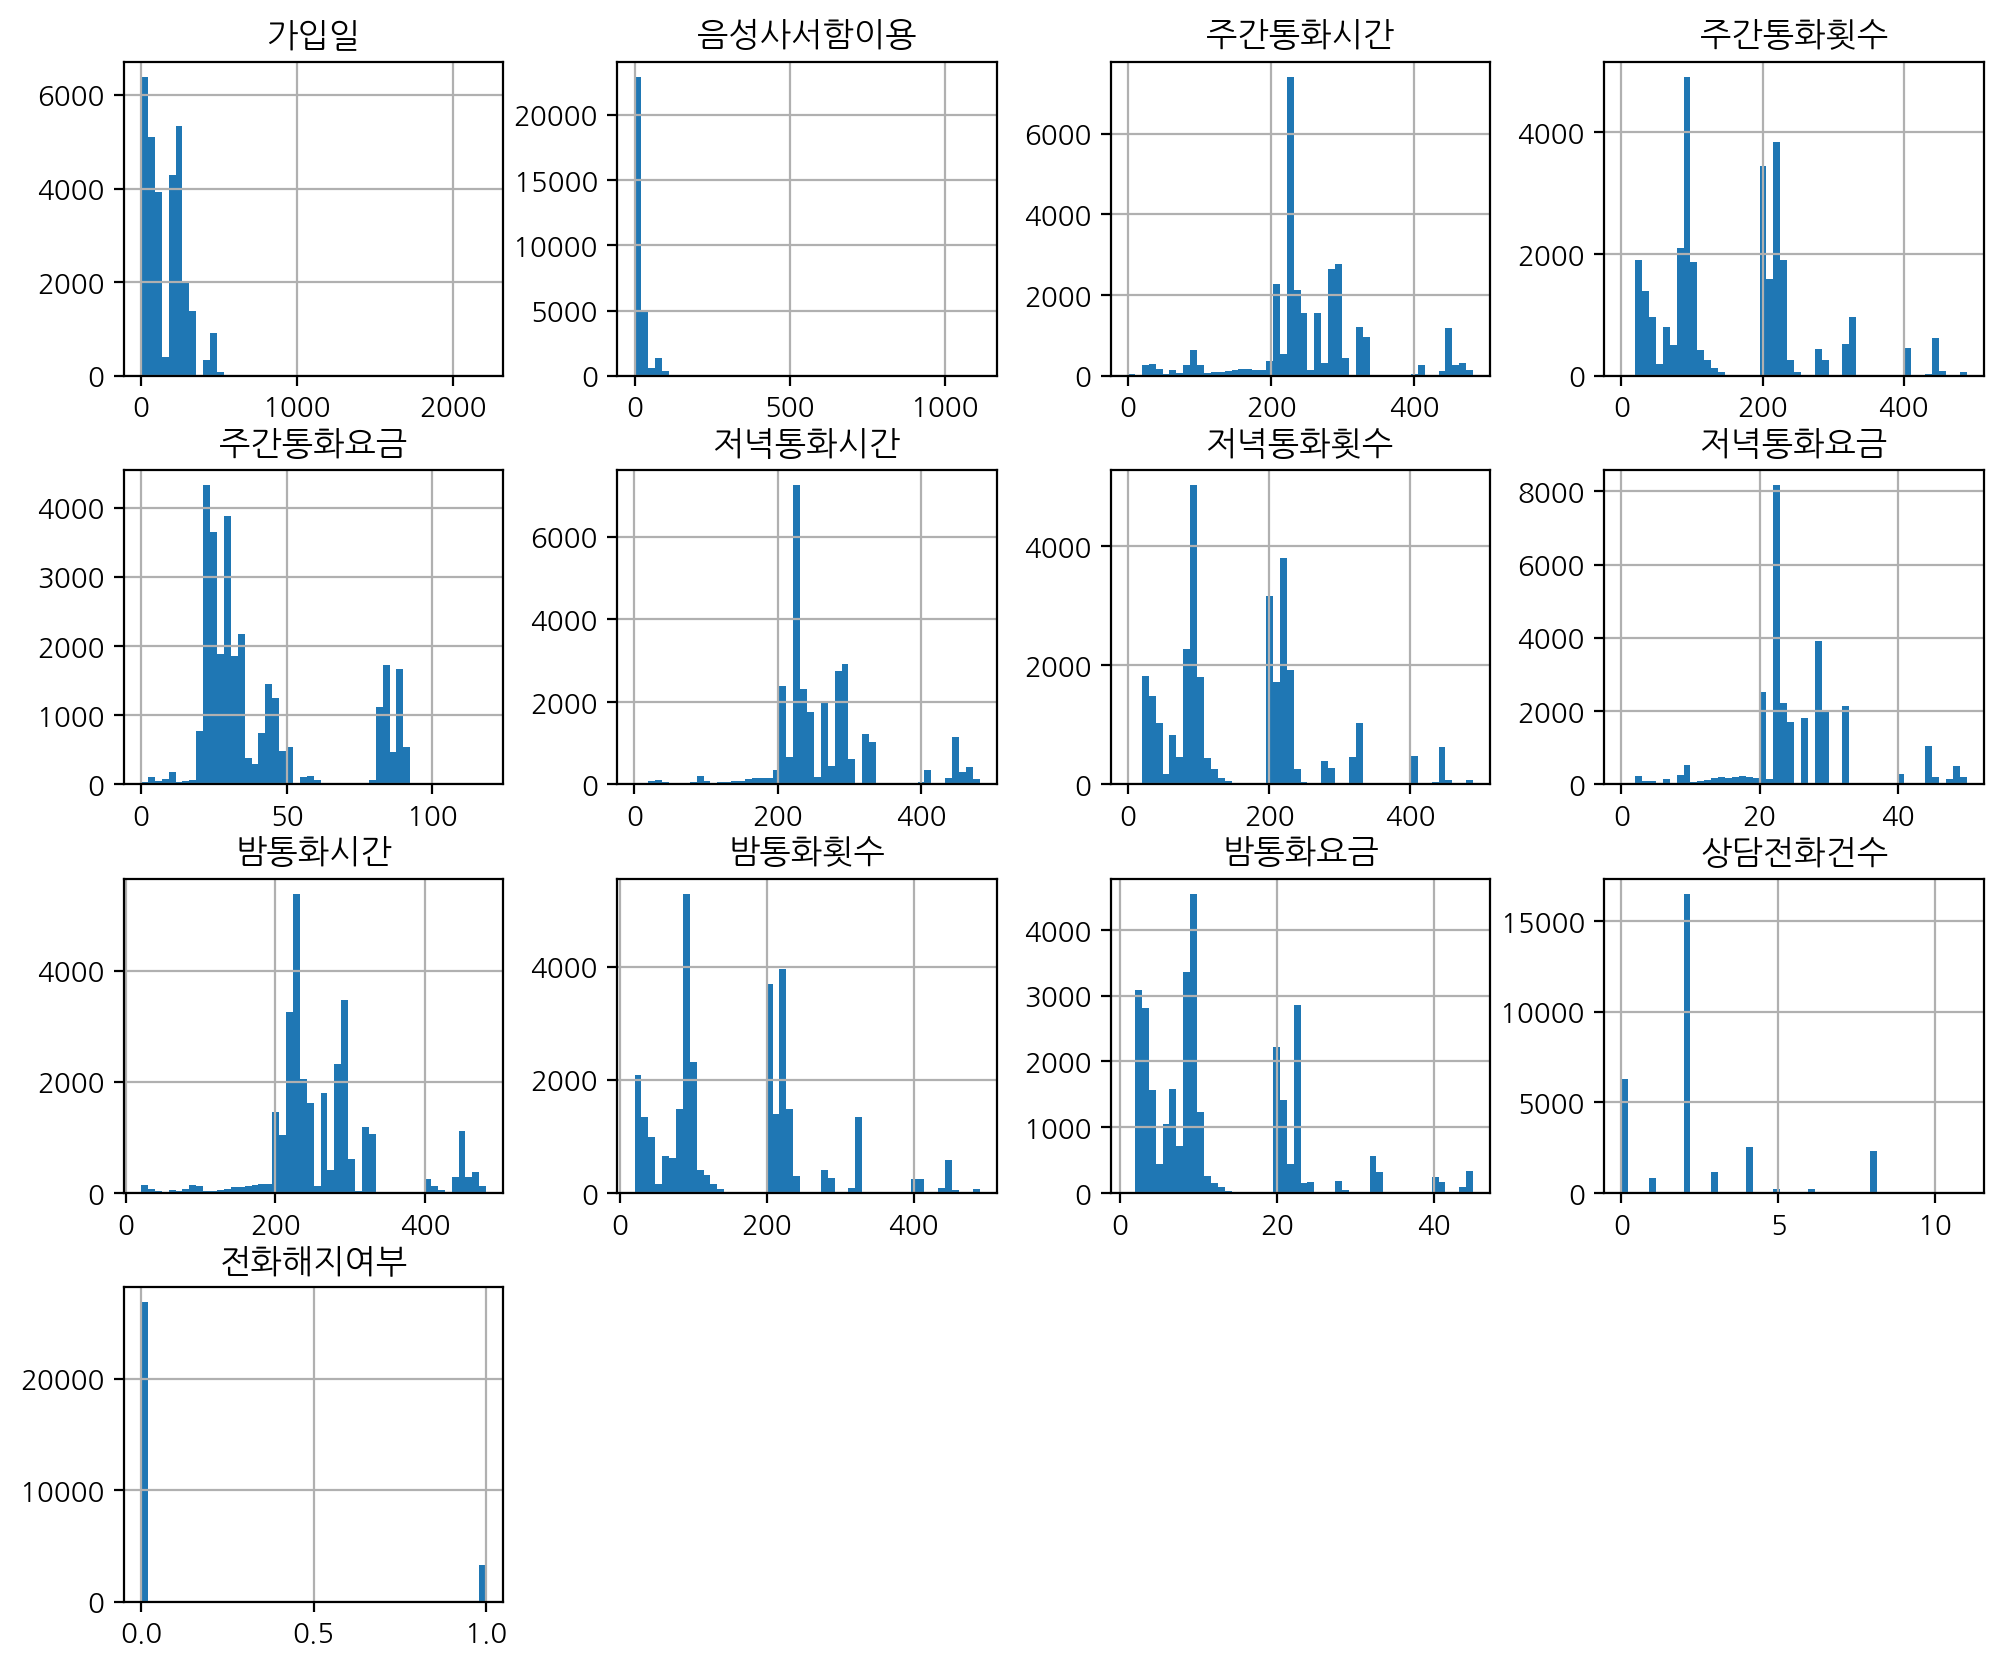

In [9]:
train.hist(figsize=(12, 10), bins=50);

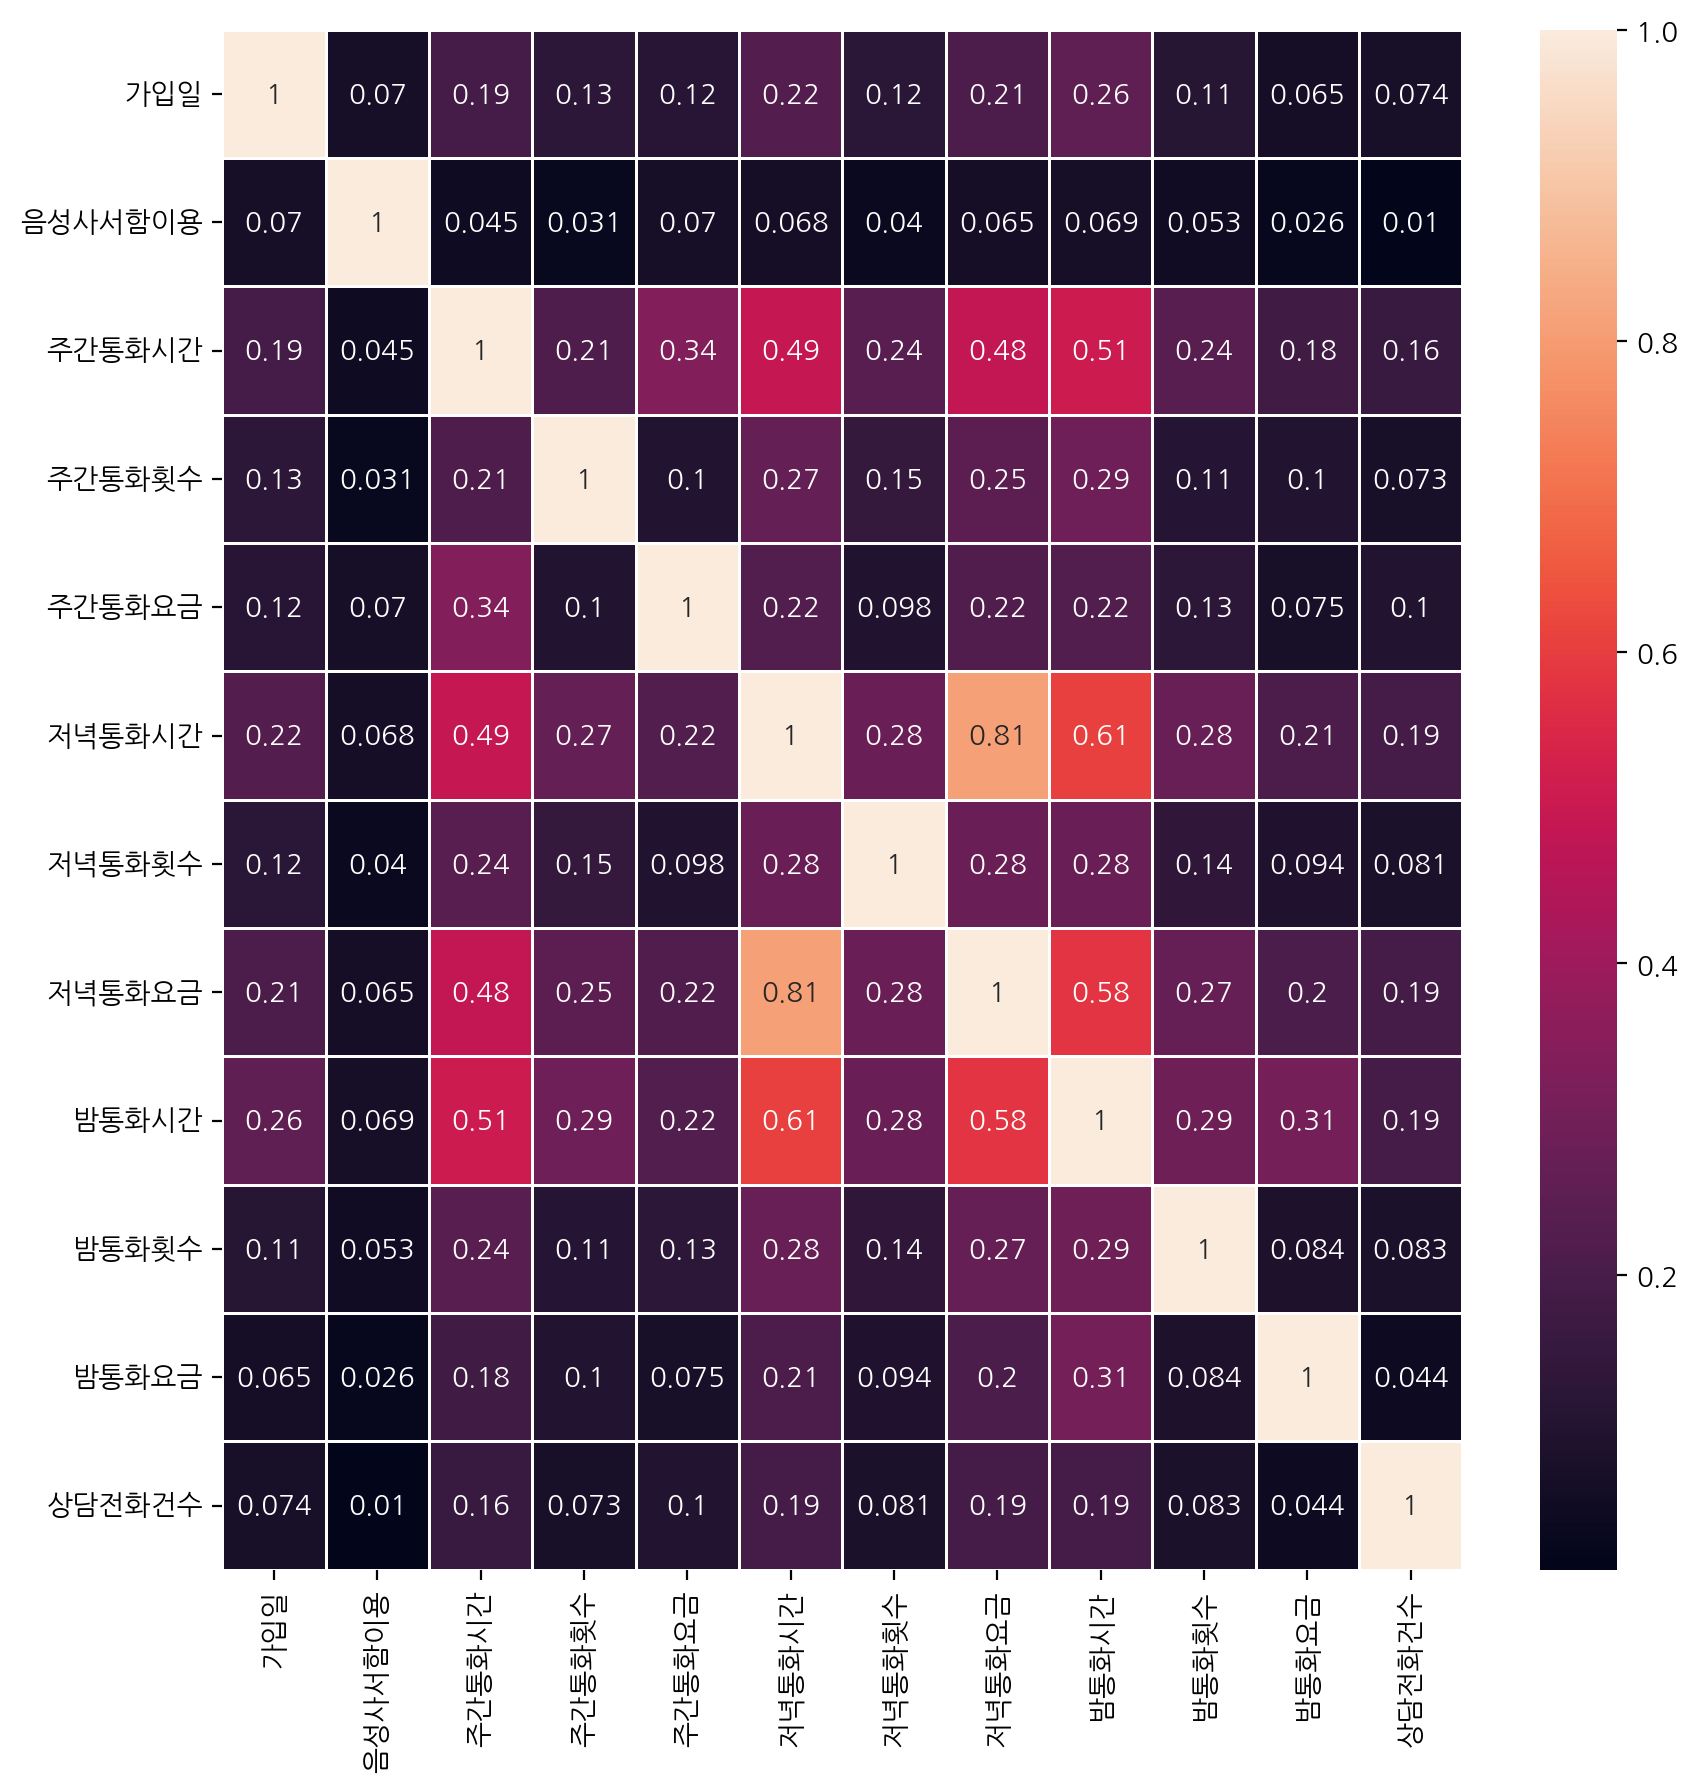

In [10]:
plt.figure(figsize = (10,10))

sns.heatmap(train.drop(['전화해지여부'], axis=1).corr(), annot =True, linewidth = 1);

In [11]:
cols = train.drop(['전화해지여부'], axis=1).columns.tolist()

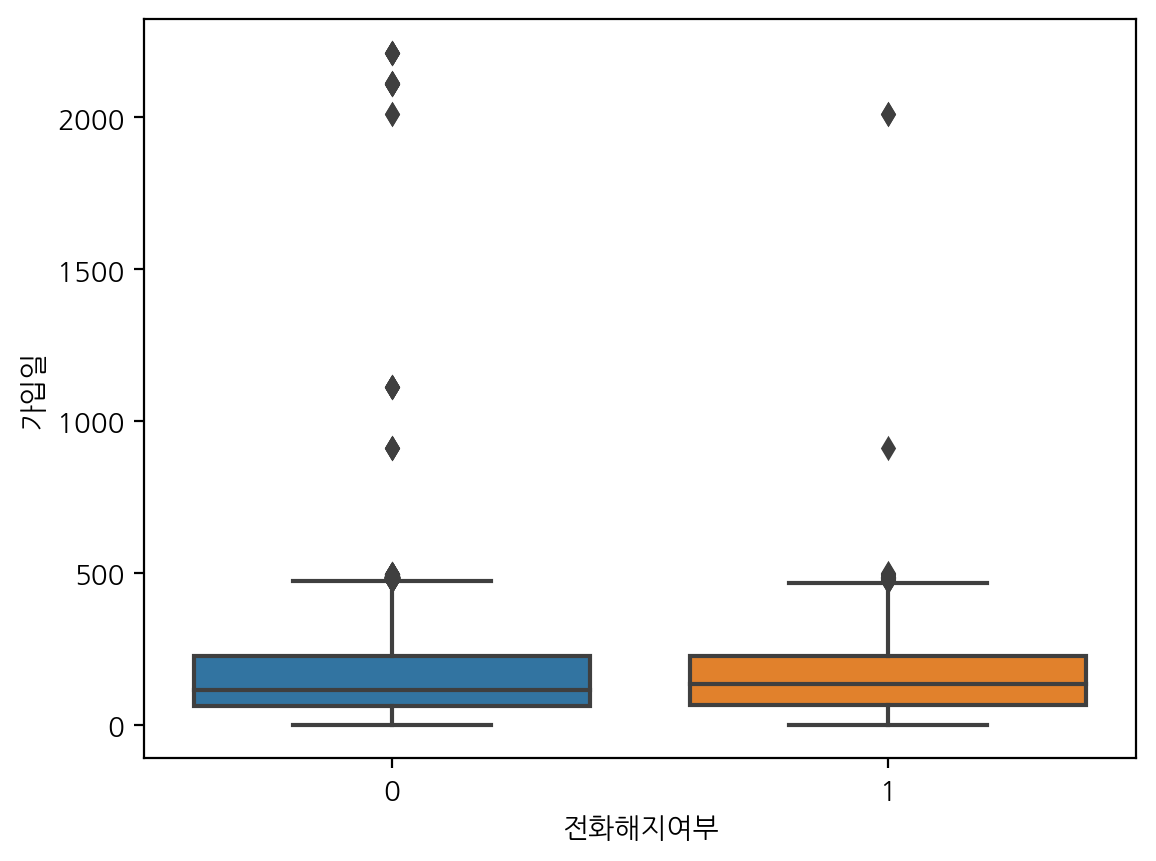

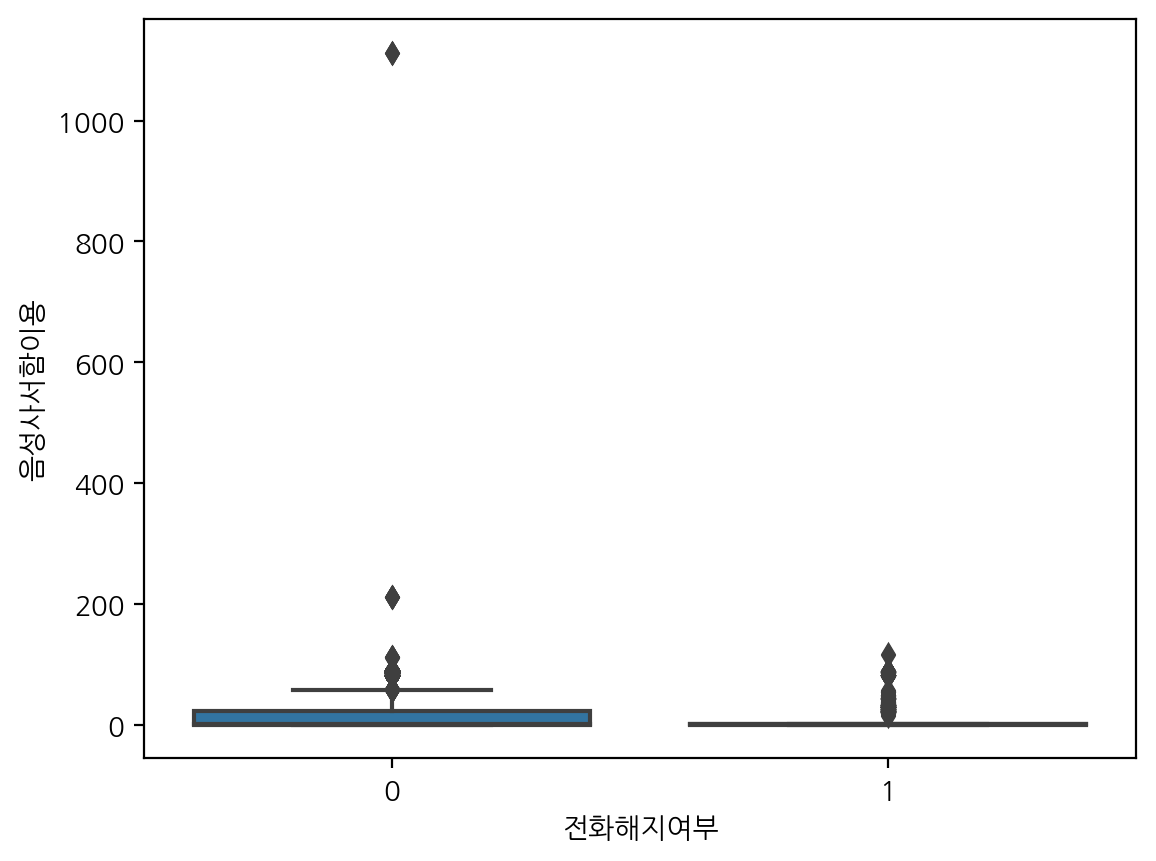

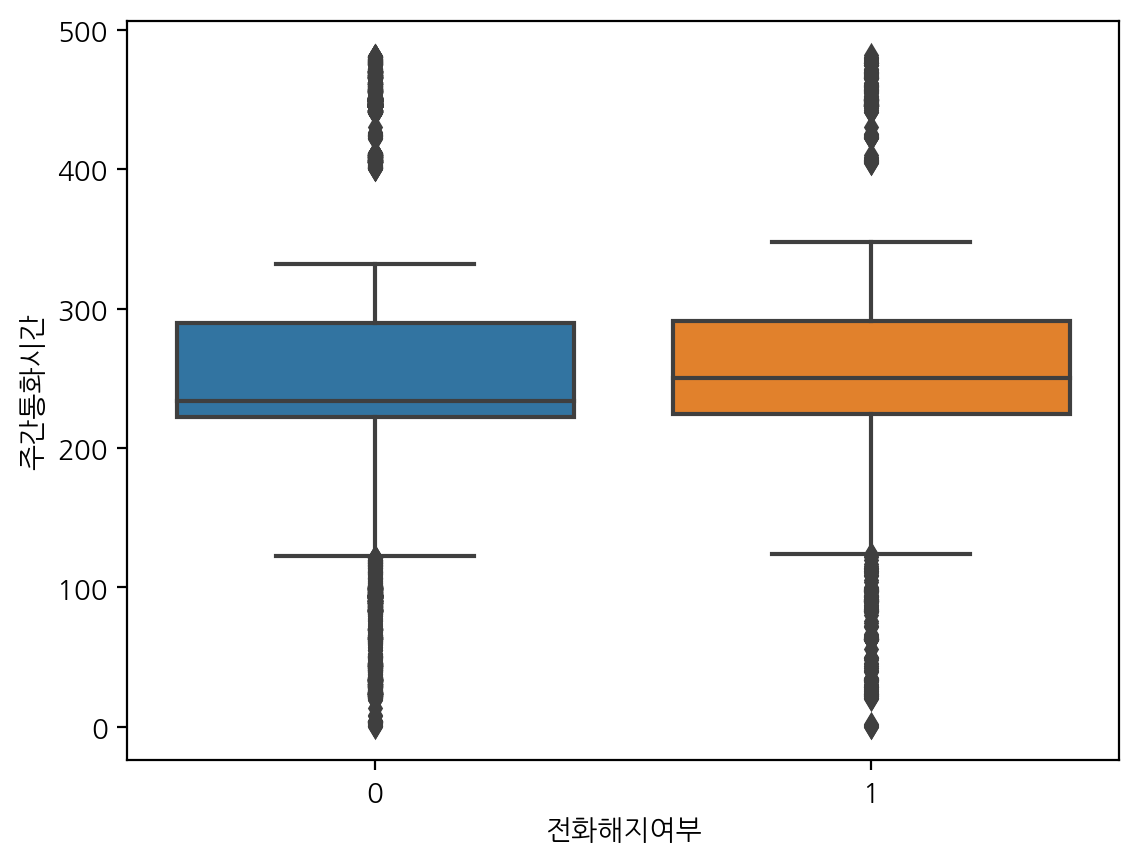

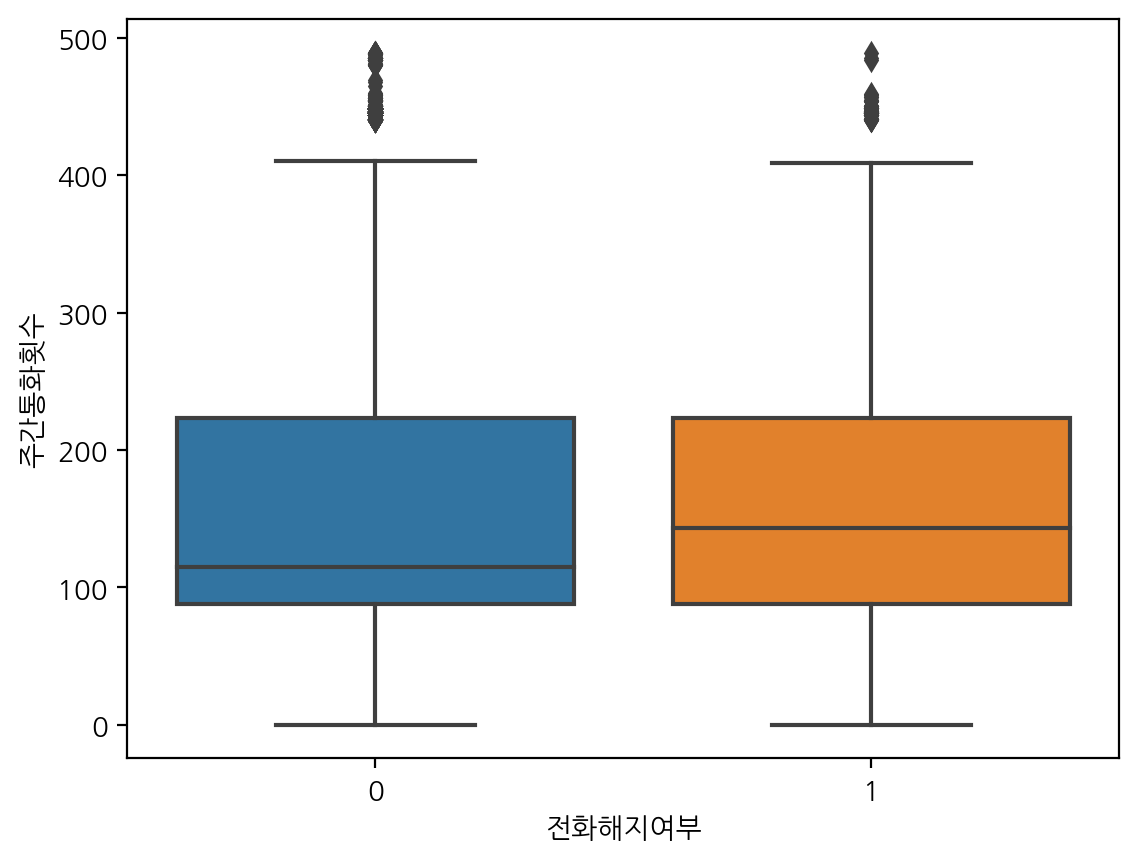

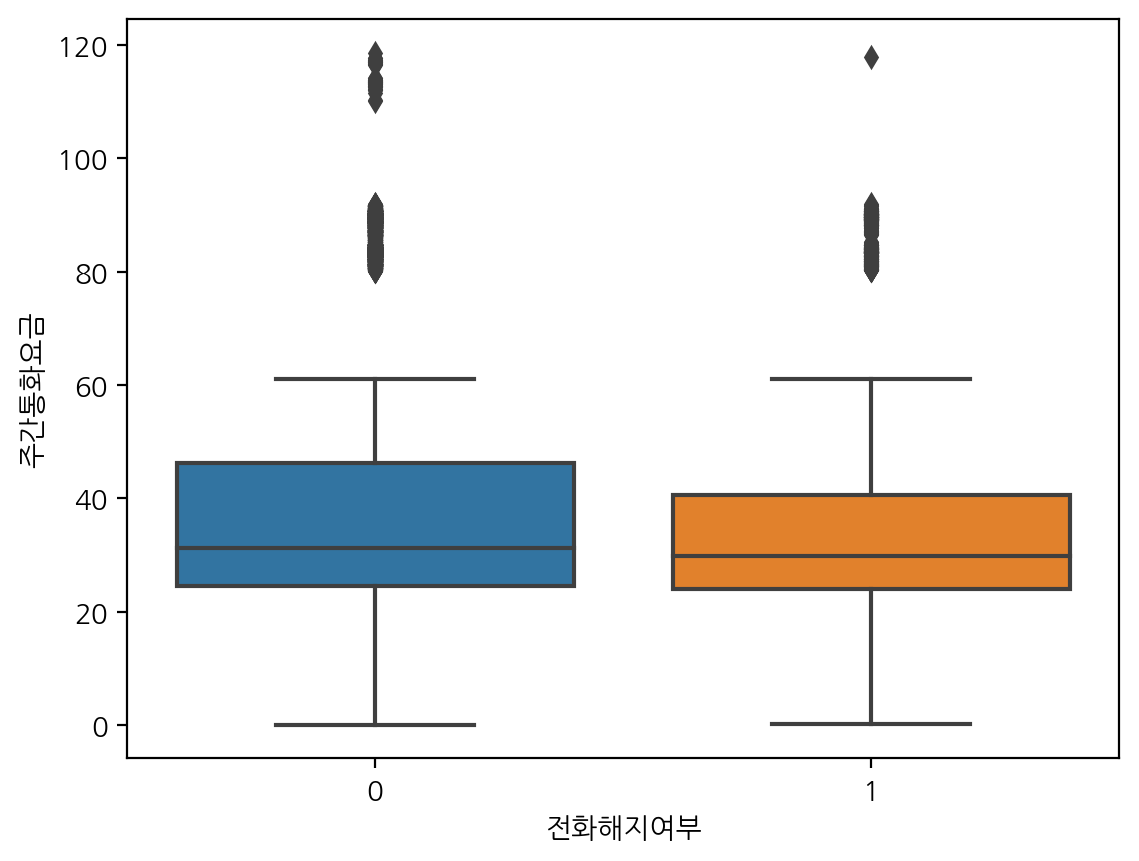

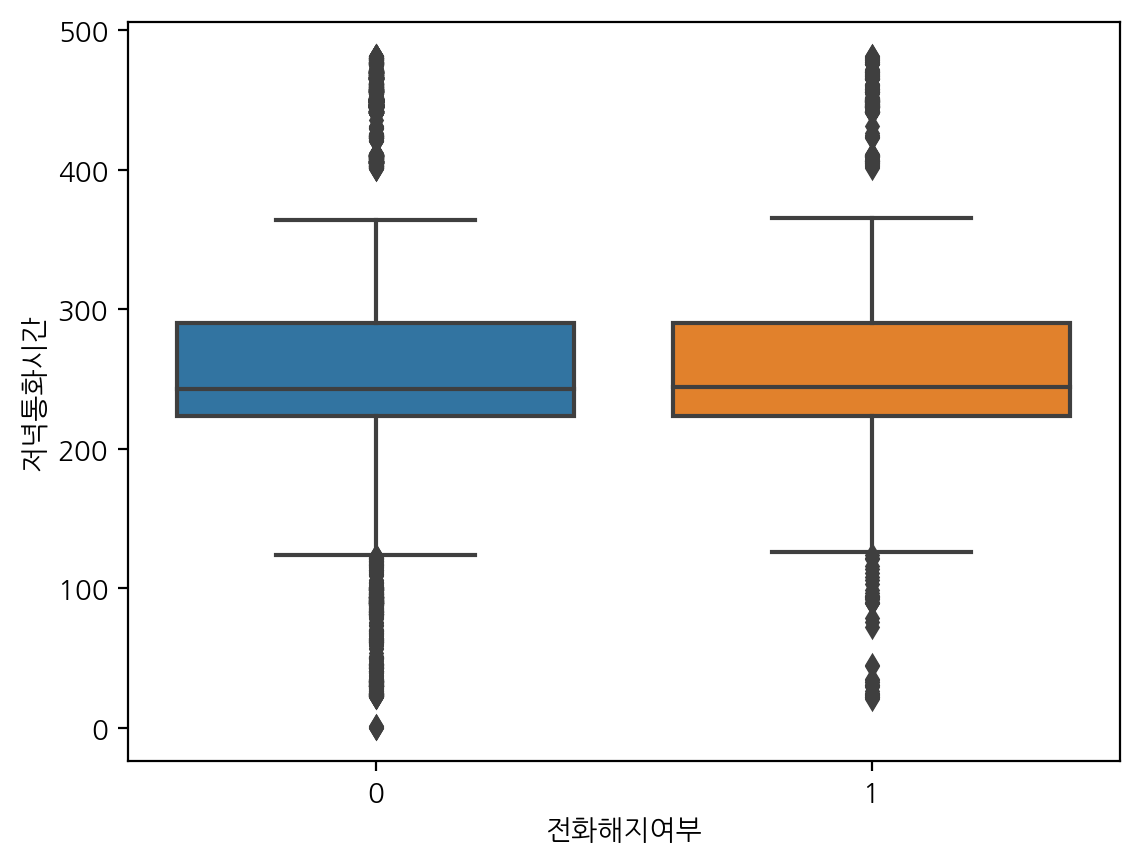

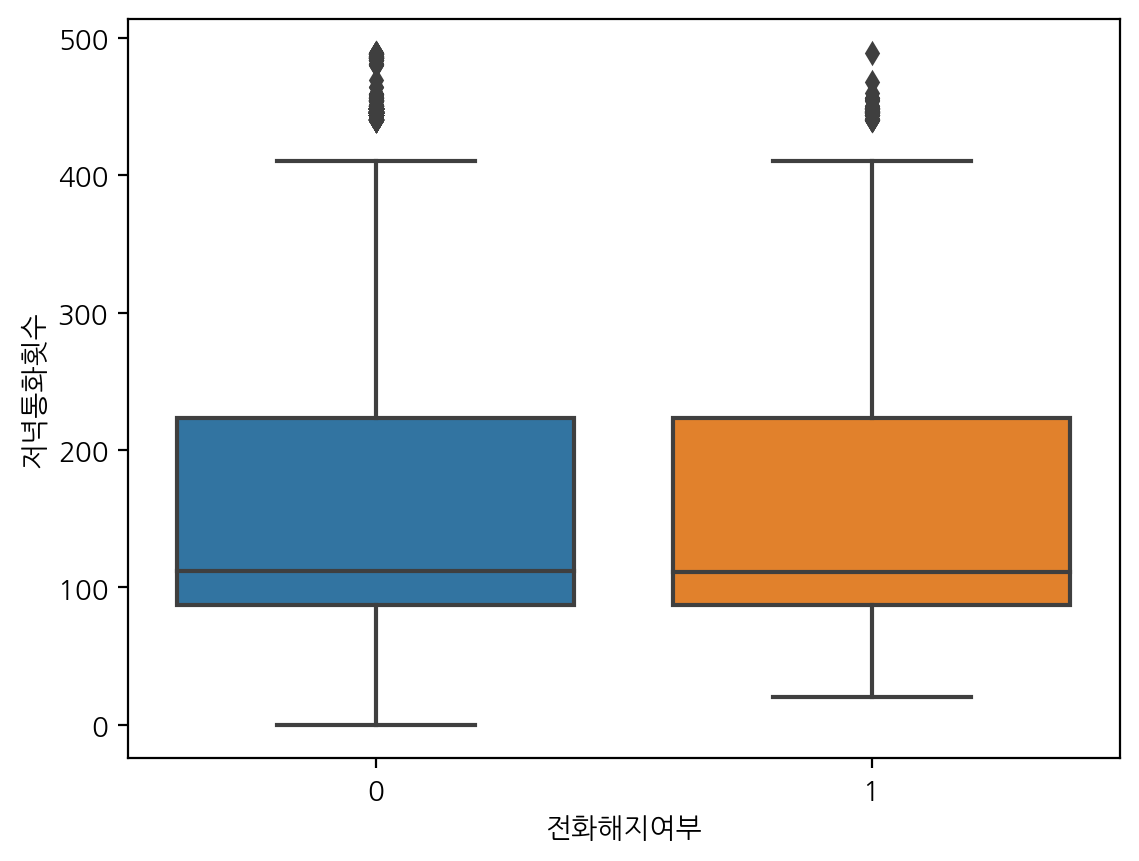

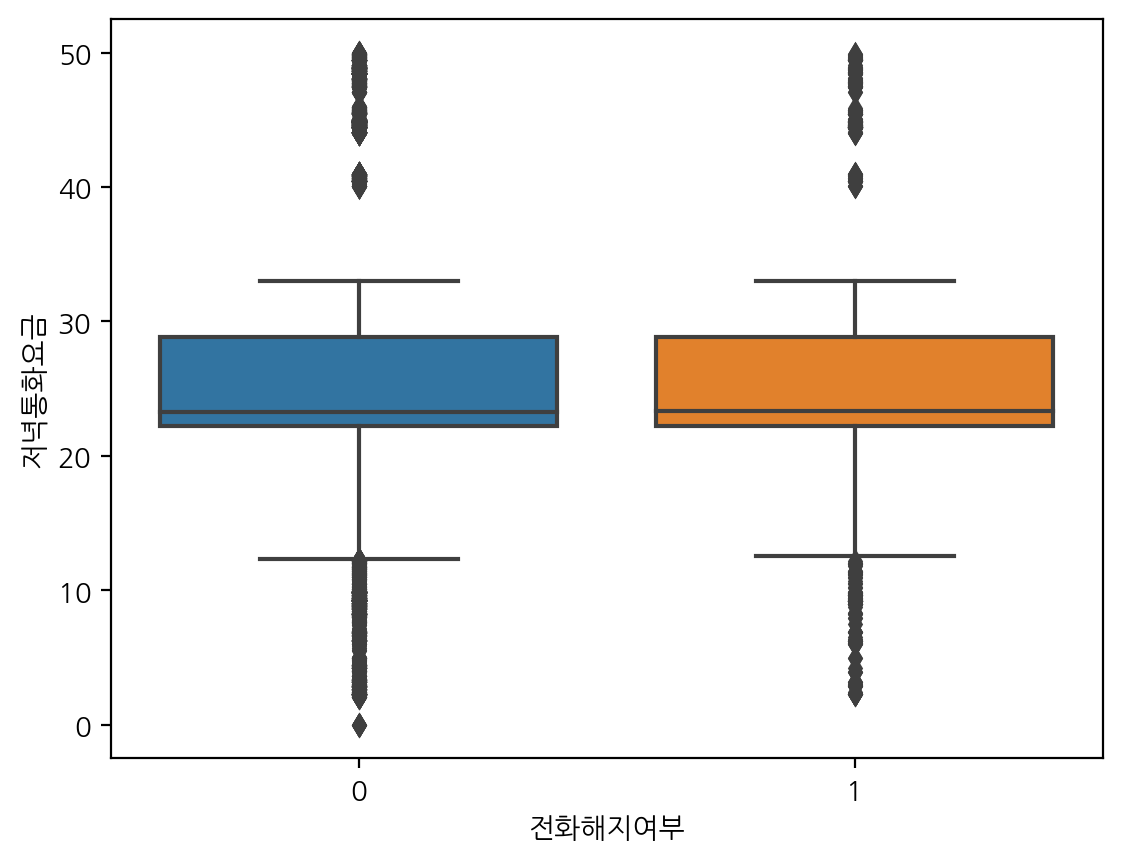

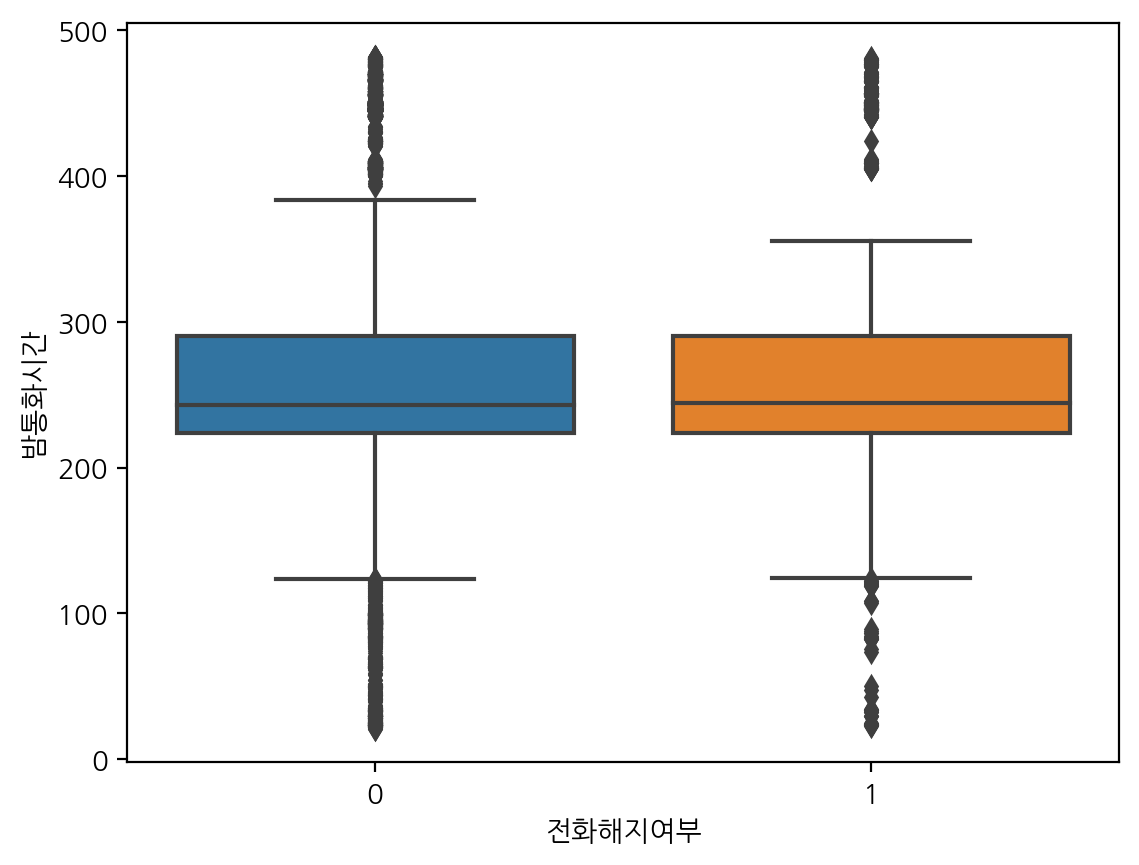

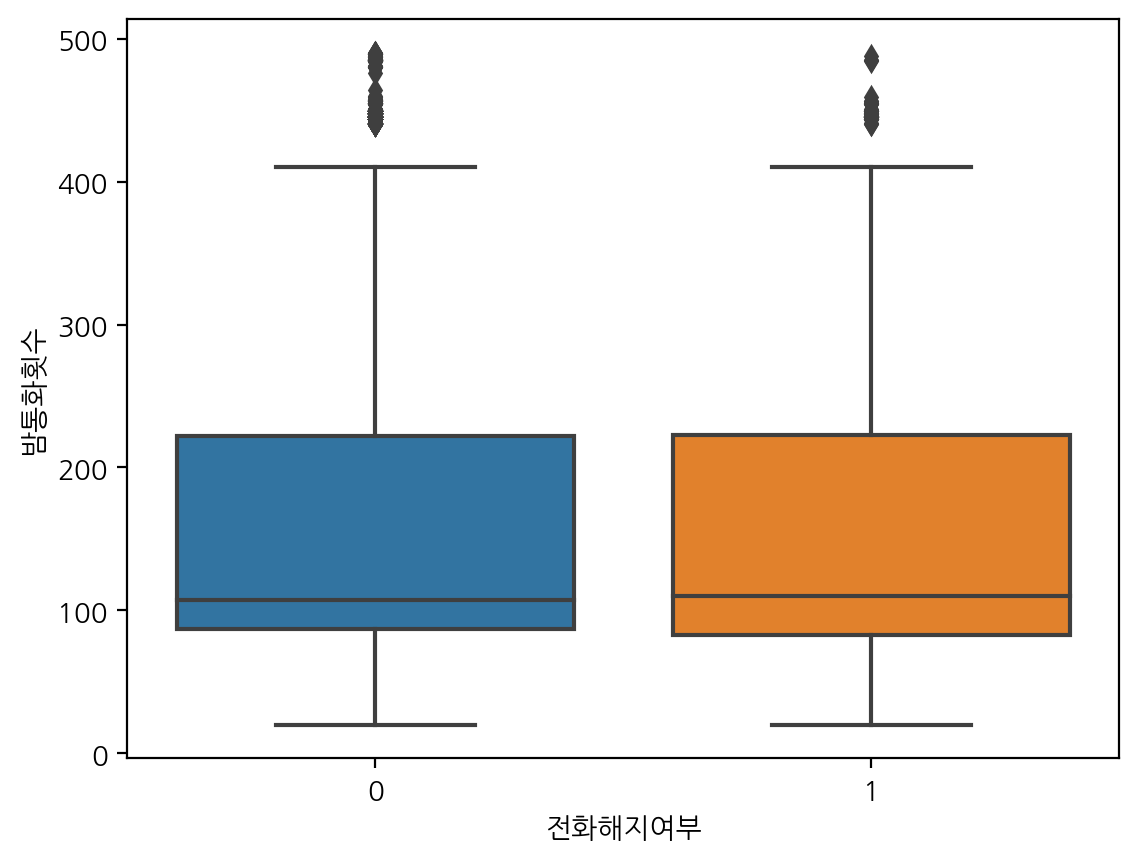

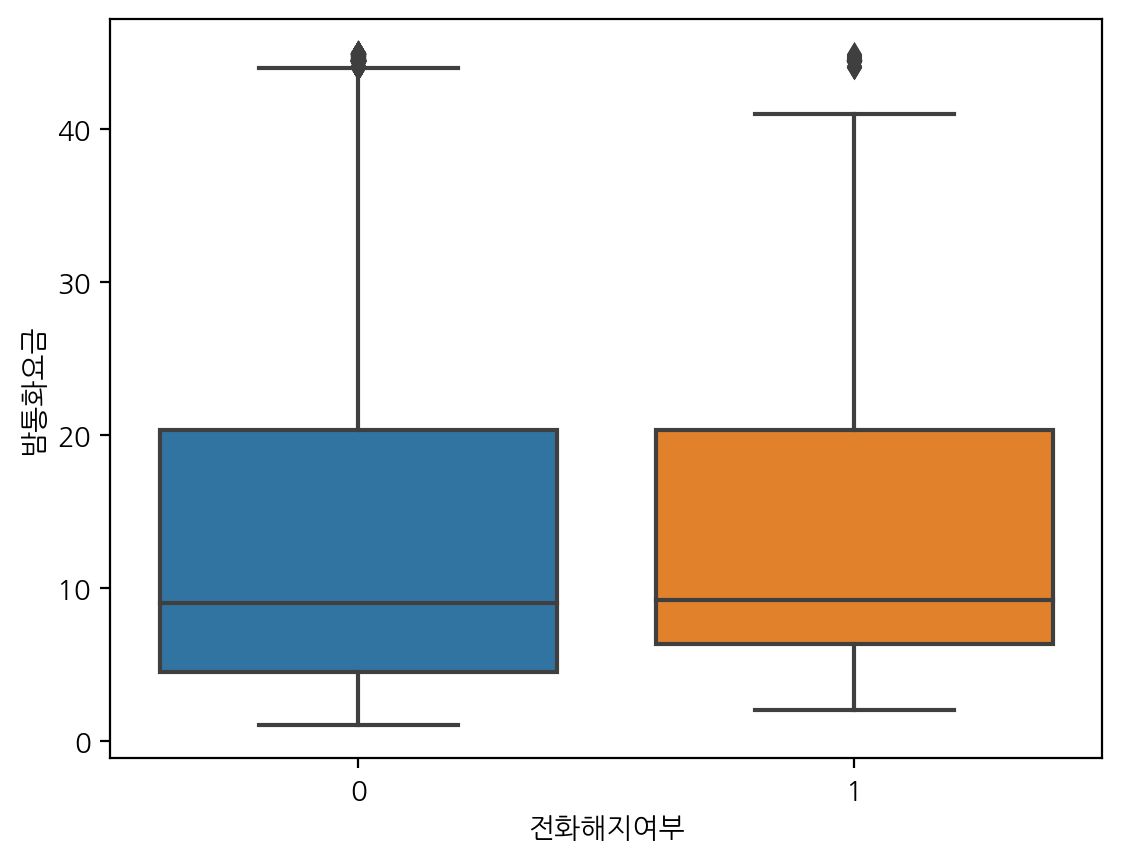

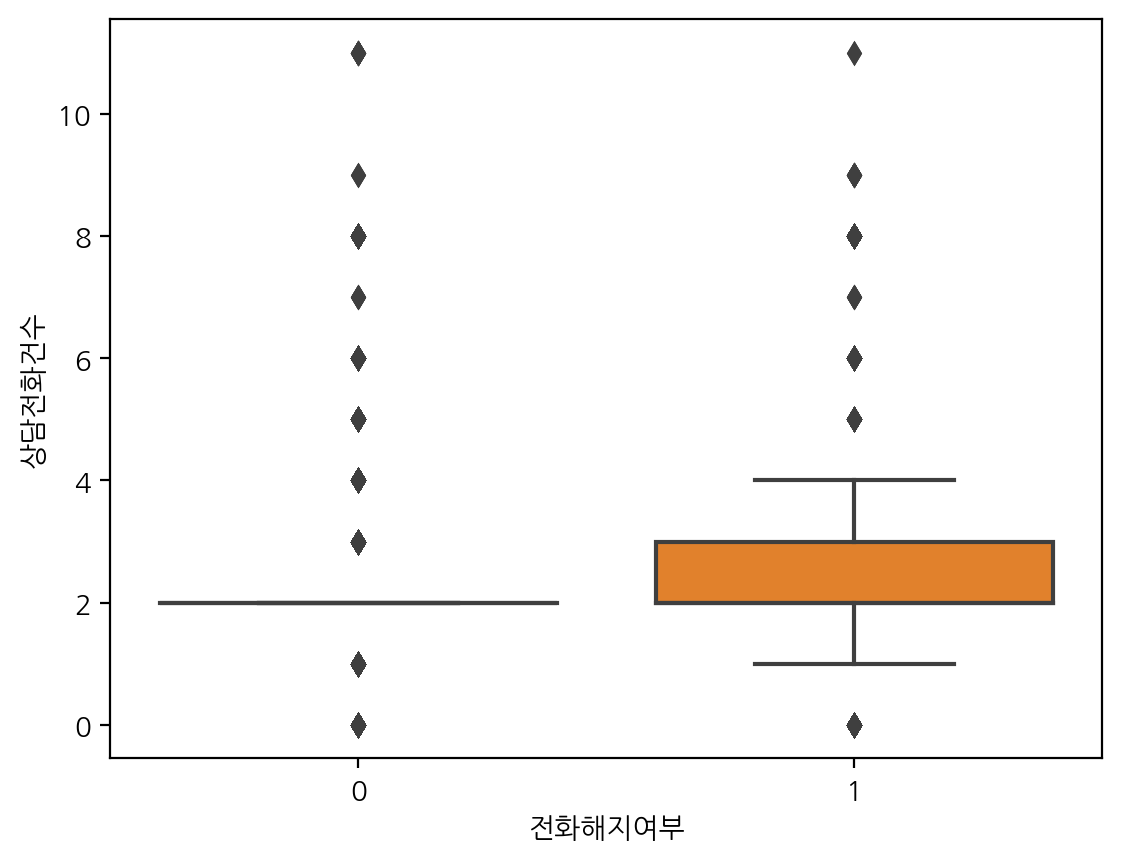

In [12]:
for col in cols:
    sns.boxplot(x = train['전화해지여부'], y = train[col])
    plt.show()

# 2. Feature Engineering

## 이상치 제거

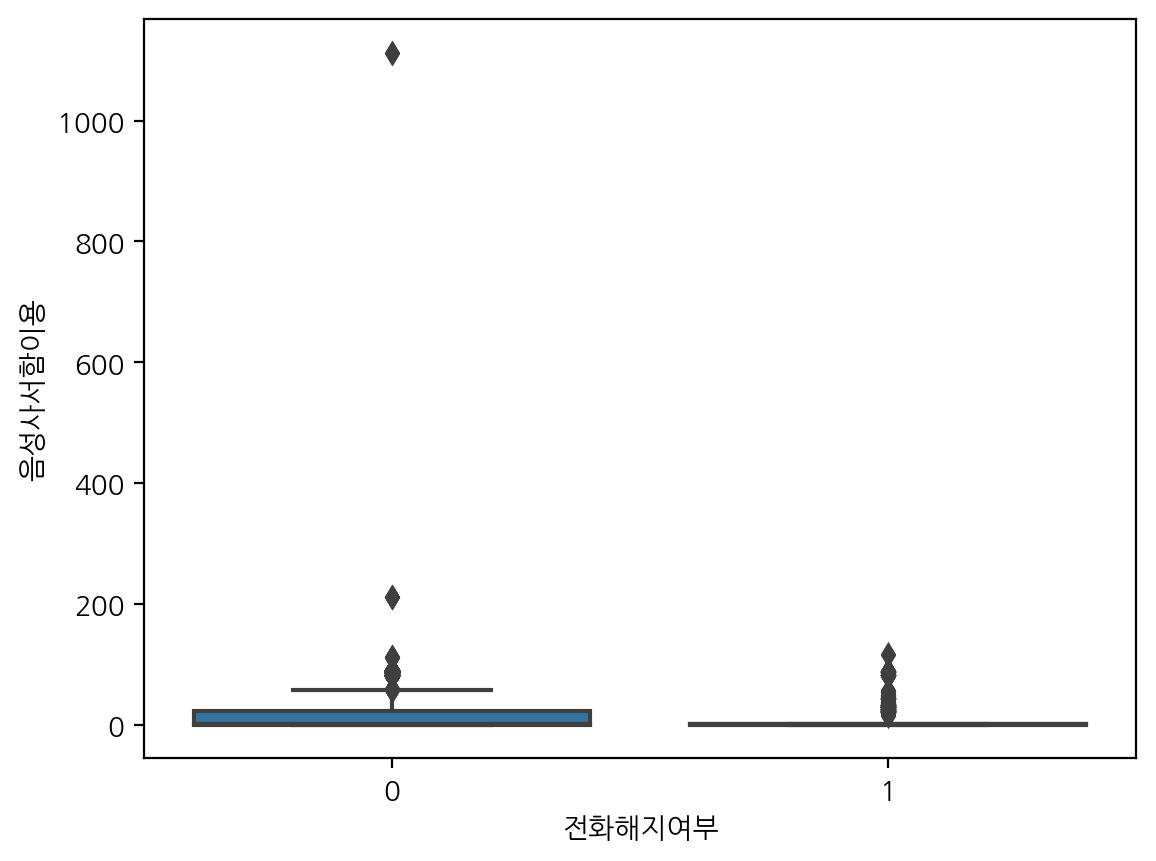

음성사서함 이상치 제거할 것

In [13]:
train = train.loc[train["음성사서함이용"]<500]
test = test.loc[test["음성사서함이용"]<500]

통화시간이 0분인데 통화요금이 1원 이상인 경우 이상치라고 판단하여 drop

In [14]:
train = train[~((train['주간통화시간'] == 0) & (train['주간통화요금'] != 0))]
train = train[~((train['저녁통화시간'] == 0) & (train['저녁통화요금'] != 0))]
train = train[~((train['밤통화시간'] == 0) & (train['밤통화요금'] != 0))]

test = test[~((test['주간통화시간'] == 0) & (test['주간통화요금'] != 0))]
test = test[~((test['저녁통화시간'] == 0) & (test['저녁통화요금'] != 0))]
test = test[~((test['밤통화시간'] == 0) & (test['밤통화요금'] != 0))]

## 파생변수 만들기

In [15]:
train['전체통화시간'] = train['주간통화시간'] + train['저녁통화시간'] + train['밤통화시간']
train['전체통화요금'] = train['주간통화요금'] + train['저녁통화요금'] + train['밤통화요금']
train['평균통화시간'] = train['전체통화시간'] / (train['주간통화횟수'] + train['저녁통화횟수'] + train['밤통화횟수'])
train['평균통화요금'] = train['전체통화요금'] / (train['주간통화횟수'] + train['저녁통화횟수'] + train['밤통화횟수'])
train['전체통화횟수'] = train['주간통화횟수'] + train['저녁통화횟수'] + train['밤통화횟수']
train['평균통화횟수'] = train['전체통화횟수'] / train['가입일']

test['전체통화시간'] = test['주간통화시간'] + test['저녁통화시간'] + test['밤통화시간']
test['전체통화요금'] = test['주간통화요금'] + test['저녁통화요금'] + test['밤통화요금']
test['평균통화시간'] = test['전체통화시간'] / (test['주간통화횟수'] + test['저녁통화횟수'] + test['밤통화횟수'])
test['평균통화요금'] = test['전체통화요금'] / (test['주간통화횟수'] + test['저녁통화횟수'] + test['밤통화횟수'])
test['전체통화횟수'] = test['주간통화횟수'] + test['저녁통화횟수'] + test['밤통화횟수']
test['평균통화횟수'] = test['전체통화횟수'] / test['가입일']

# 3. autogluon

In [16]:
pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━

In [17]:
from autogluon.tabular import TabularDataset, TabularPredictor
import autogluon.core as ag

In [18]:
label = '전화해지여부'
eval_metric = 'f1_macro'
time_limit = 60 #너무오래걸림

In [19]:
excluded_model_types = ['CAT']

predictor = TabularPredictor(
    label=label, problem_type='binary', eval_metric=eval_metric
).fit(train, 
      presets='best_quality', 
      num_stack_levels=3,
      #excluded_model_types = excluded_model_types,
      time_limit=time_limit, num_gpus=1)

No path specified. Models will be saved in: "AutogluonModels/ag-20230411_033447/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20230411_033447/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    30196
Train Data Columns: 18
Label Column: 전화해지여부
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12502.22 MB
	Train Data (Original)  Memory Usage: 4.35 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	S

In [20]:
print(predictor.leaderboard(silent = True))

                   model  score_val  pred_time_val   fit_time  \
0  KNeighborsUnif_BAG_L1   0.612263      10.275011   0.090350   
1    WeightedEnsemble_L2   0.612263      10.403307   7.436299   
2      LightGBMXT_BAG_L1   0.470932       0.052939  31.127492   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0               10.275011           0.090350            1       True   
1                0.128296           7.345949            2       True   
2                0.052939          31.127492            1       True   

   fit_order  
0          1  
1          3  
2          2  


In [21]:
predictor.feature_importance(train)

Computing feature importance via permutation shuffling for 18 features using 5000 rows with 5 shuffle sets...
	136.31s	= Expected runtime (27.26s per shuffle set)
	101.43s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
전체통화횟수,0.179145,0.007263,3.235637e-07,5,0.194100,0.164189
가입일,0.162226,0.009972,1.704825e-06,5,0.182759,0.141693
전체통화시간,0.155765,0.011348,3.356229e-06,5,0.179130,0.132400
저녁통화횟수,0.134635,0.018529,4.198277e-05,5,0.172786,0.096483
주간통화횟수,0.126020,0.012737,1.235278e-05,5,0.152245,0.099795
밤통화횟수,0.125319,0.009377,3.734202e-06,5,0.144627,0.106011
주간통화시간,0.098702,0.016033,8.068055e-05,5,0.131714,0.065691
저녁통화시간,0.081454,0.006074,3.682608e-06,5,0.093960,0.068948
밤통화시간,0.073367,0.007158,1.073858e-05,5,0.088106,0.058627
음성사서함이용,0.021134,0.005467,4.927584e-04,5,0.032391,0.009876


In [22]:
model = predictor.get_model_best()
y_test = predictor.predict(test, model=model)

In [26]:
submission = pd.read_csv('/gdrive/My Drive/Colab Notebooks/data/cancel_call/sample_submission.csv')

submission["전화해지여부"] = y_test
submission.to_csv('Gluon_submission.csv', index=False, encoding="utf-8")

#### 시간 너무 오래걸려서 짧게함